In [1]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [2]:
data_image = 'fashion-data/images/'
data_anno = 'fashion-data/annotation/'

data_image_train = data_image + 'train2020/train/'
# data_anno_train = data_anno + 'attributes_train2020.json'
data_anno_train = data_anno + 'instances_attributes_train2020.json'

image name: cbce4c62190f61ad6fac507949ade525.jpg


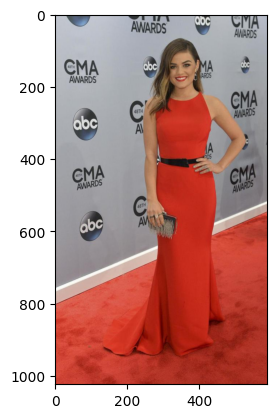

In [3]:
img_list = os.listdir(data_image_train)
rand_img = random.choice(img_list)

img = Image.open(data_image_train + rand_img)

print(f'image name: {rand_img}')
plt.imshow(img)

In [4]:
with open(data_anno_train) as f:
    train_anno = json.load(f)

train_anno.keys()

dict_keys(['annotations', 'images', 'info', 'licenses', 'categories', 'attributes'])

In [5]:
def get_image_infor(image_name, anno):
    for item in anno['images']:
        if(image_name == item['file_name']):
            return item
        
def get_image_anno(image_id, anno):
    for item in anno['annotations']:
        if(item['image_id'] == image_id):
            return item

def get_image_attributes(id_atts, anno_att):
    image_attributes = [{'id': item['id'], 'name': item['name']} for item in anno_att if item['id'] in id_atts]
    return image_attributes

In [6]:
image_infor = get_image_infor(rand_img, train_anno)
image_infor

{'id': 40919,
 'width': 588,
 'height': 1024,
 'file_name': 'cbce4c62190f61ad6fac507949ade525.jpg',
 'license': 2,
 'time_captured': 'September-December, 2018',
 'original_url': 'http://farm4.staticflickr.com/3945/15535783237_bd21bbaa89_n.jpg',
 'isstatic': 1,
 'kaggle_id': 'cbce4c62190f61ad6fac507949ade525'}

In [7]:
image_anno = get_image_anno(image_infor['id'], train_anno)
image_anno

{'image_id': 40919,
 'category_id': 10,
 'attribute_ids': [317, 108, 295, 155, 121, 311, 115, 229, 141],
 'segmentation': [[371,
   236,
   383,
   231,
   393,
   222,
   397,
   217,
   392,
   212,
   401,
   213,
   414,
   240,
   424,
   269,
   431,
   288,
   431,
   301,
   429,
   312,
   429,
   322,
   426,
   325,
   419,
   353,
   414,
   372,
   415,
   376,
   413,
   378,
   414,
   384,
   415,
   387,
   407,
   395,
   398,
   397,
   382,
   400,
   364,
   401,
   361,
   399,
   341,
   399,
   319,
   400,
   304,
   399,
   290,
   396,
   287,
   389,
   285,
   367,
   283,
   349,
   279,
   326,
   278,
   299,
   277,
   287,
   277,
   271,
   284,
   268,
   292,
   260,
   299,
   258,
   295,
   273,
   299,
   271,
   302,
   254,
   304,
   258,
   315,
   271,
   322,
   268,
   313,
   260,
   307,
   254,
   311,
   242,
   316,
   230,
   325,
   234,
   343,
   238,
   359,
   239],
  [287,
   407,
   281,
   417,
   280,
   452,
   278,
   475

In [8]:
image_attributes = get_image_attributes(image_anno['attribute_ids'], train_anno['attributes'])
image_attributes

[{'id': 108, 'name': 'gown'},
 {'id': 115, 'name': 'symmetrical'},
 {'id': 121, 'name': 'mermaid'},
 {'id': 141, 'name': 'high waist'},
 {'id': 155, 'name': 'floor (length)'},
 {'id': 229, 'name': 'zip-up'},
 {'id': 295, 'name': 'no non-textile material'},
 {'id': 311, 'name': 'lining'},
 {'id': 317, 'name': 'plain (pattern)'}]

NameError: name 'box' is not defined

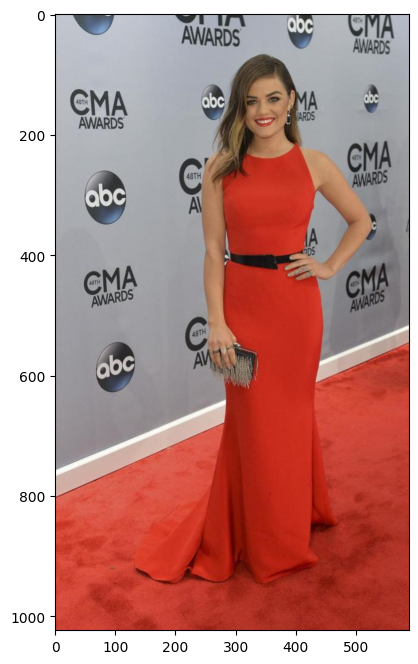

In [9]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img)

x, y, w, h = box
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)